In [2]:
import pandas as pd
glutenfree=pd.read_csv('glutenfree.csv')
beers=pd.read_csv('beers.csv')
breweries=pd.read_csv('breweries.csv')
microbreweries=pd.read_csv('micro-breweries.csv')

## Diversity of beer style 

In [20]:
glutenfree_style

style
 Abbey Dubbel                       34
 Abbey Tripel                       12
 Amber Ale                         106
 American Pale Ale                 792
 Baltic Porter                       2
 Belgian Ale                       228
 Brown Ale                           1
 Cider                               1
 Czech Pilsner (Světlý)             36
 Dunkel/Tmavý                        2
 English Pale Ale                    1
 Fruit Beer                          8
 German Hefeweizen                  10
 Golden Ale/Blond Ale               76
 Grodziskie/Gose/Lichtenhainer      22
 Imperial Stout                     14
 India Pale Ale (IPA)              305
 Low Alcohol                        32
 Oktoberfest/Märzen                 61
 Pale Lager                        180
 Pilsener                           74
 Porter                             13
 Premium Bitter/ESB                  3
 Premium Lager                     304
 Saison                             45
 Sour/Wild Ale     

In [21]:
style_micro=microbreweries.groupby('style')['beer_name'].count()
style_micro

style
 Abbey Dubbel                617
 Abbey Tripel               1478
 Abt/Quadrupel               534
 Altbier                      44
 Amber Ale                  1001
                            ... 
 Traditional Ale              83
 Weizen Bock                  89
 Wheat Ale                   346
 Witbier                    1100
 Zwickel/Keller/Landbier       6
Name: beer_name, Length: 80, dtype: int64

In [22]:
total_style=beers.groupby('style')['beer_name'].count()
total_style

style
Abbey Dubbel                3004
Abbey Tripel                3905
Abt/Quadrupel               1565
Altbier                     2094
Amber Ale                  11664
                           ...  
Traditional Ale             1894
Weizen Bock                 1586
Wheat Ale                   7234
Witbier                     6514
Zwickel/Keller/Landbier     2703
Name: beer_name, Length: 94, dtype: int64

In [23]:
nb_style_microbreweries=len(style_micro)
nb_style_beer=len(total_style)

In [27]:
print(f'The microbreweries produce together {nb_style_microbreweries} different styles of beer. ')
print(f'It exists {len(glutenfree_style)} different styles of beer among gluten-free beers.')
print(f'In the entire dataset, we count {nb_style_beer} different styles of beer.')



The microbreweries produce together 80 different styles of beer. 
It exists 31 different styles of beer among gluten-free beers.
In the entire dataset, we count 94 different styles of beer.


In [30]:
print(f'percentage of gluten_free beers : {len(glutenfree.index)/len(beers.index)*100}')
print(f'percentage of beers from micro-breweries : {len(microbreweries.index)/len(beers.index)*100}')


percentage of gluten_free beers : 0.8527848968854125
percentage of beers from micro-breweries : 7.361546865845852


## Analyse of the location of Microbreweries

In [155]:
microbreweries_subset = microbreweries[['brewery_id']]
breweries_subset = breweries[['id', 'location']]


In [177]:
# Merge the DataFrames based on the 'brewery_name' and 'name' columns
microbreweries_location = pd.merge(micro_unique, breweries_subset, how='left', left_on='brewery_id', right_on='id')
microbreweries_location.drop('id', axis=1, inplace=True)

microbreweries_location


,brewery_id,location
0,NaN,NaN
1,15008.0,Singapore
2,21778.0,Singapore
3,11664.0,Mexico
4,5562.0,Canada
...,...,...
174,21382.0,France
175,19998.0,France
176,29249.0,France
177,4253.0,Thailand


In [164]:
from collections import Counter
Counter(result['location'])

Counter({'Canada': 17936,
         'Belgium': 1364,
         'Denmark': 1208,
         'Netherlands': 1035,
         nan: 720,
         'Greece': 492,
         'United States, Washington': 485,
         'United States, California': 448,
         'Sweden': 438,
         'England': 398,
         'Norway': 343,
         'United States, Texas': 331,
         'Germany': 331,
         'Spain': 319,
         'Finland': 315,
         'United States, Illinois': 309,
         'United States, Florida': 294,
         'United States, Missouri': 276,
         'United States, Pennsylvania': 255,
         'United States, Colorado': 238,
         'Japan': 223,
         'United States, New York': 219,
         'Poland': 215,
         'United States, New Jersey': 210,
         'Italy': 197,
         'United States, Maryland': 185,
         'United States, Ohio': 174,
         'United States, Michigan': 173,
         'France': 170,
         'United States, Virginia': 155,
         'Australia': 150,
      

In [165]:
stat=microbreweries_location.groupby('location').count()
stat.rename(columns={'brewery_id':'#microbreweries'}, inplace=True)


USA =stat[stat.index.str.contains('United States')].sum()
group_usa= stat[~stat.index.str.contains('United States')].copy()
group_usa.loc['United States']=USA.iloc[0]

micro=group_usa.sort_values(ascending=False, by='#microbreweries')
micro

,#microbreweries
location,
Canada,46
United States,31
Greece,20
France,15
Italy,8
Spain,6
Belgium,5
Chile,5
Brazil,4


<Axes: xlabel='location'>

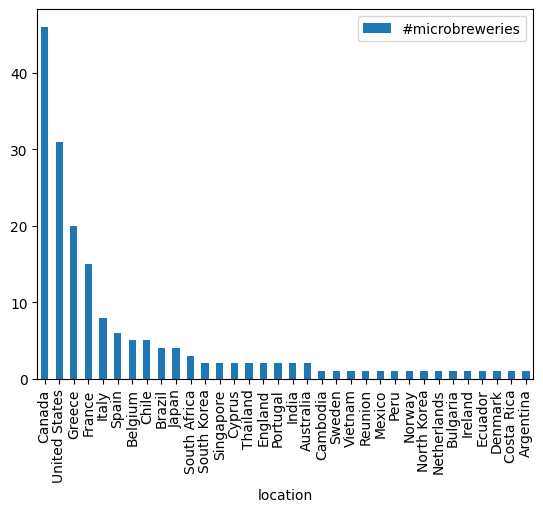

In [166]:
micro.plot(kind='bar')

In [167]:
loc_breweries=breweries.groupby('location')['name'].count().reset_index(name='#breweries(micro+macro)')
loc_breweries.set_index('location', inplace=True)

usa =loc_breweries[loc_breweries.index.str.contains('United States')].sum()
group=loc_breweries[~loc_breweries.index.str.contains('United States')].copy()
group.loc['United States']=usa

all=group.sort_values(ascending=False, by='#breweries(micro+macro)')
all

,#breweries(micro+macro)
location,
United States,6921
England,2124
Germany,1999
Italy,1051
Canada,884
...,...
Libya,1
Norfolk Island,1
Swaziland,1


In [168]:

merge=pd.merge(micro,all, how='left',left_on='location', right_on='location')
merge['proportion_microbreweries']=merge['#microbreweries']/merge['#breweries(micro+macro)']
merge.sort_values(by='proportion_microbreweries',ascending=False, inplace=True)
merge

,#microbreweries,#breweries(micro+macro),proportion_microbreweries
location,,,
Reunion,1,3,0.333333
Greece,20,64,0.312500
Cyprus,2,10,0.200000
Singapore,2,23,0.086957
North Korea,1,19,0.052632
Canada,46,884,0.052036
Cambodia,1,21,0.047619
Bulgaria,1,27,0.037037
South Korea,2,58,0.034483


Text(0.5, 1.0, 'Proportion of microbreweries')

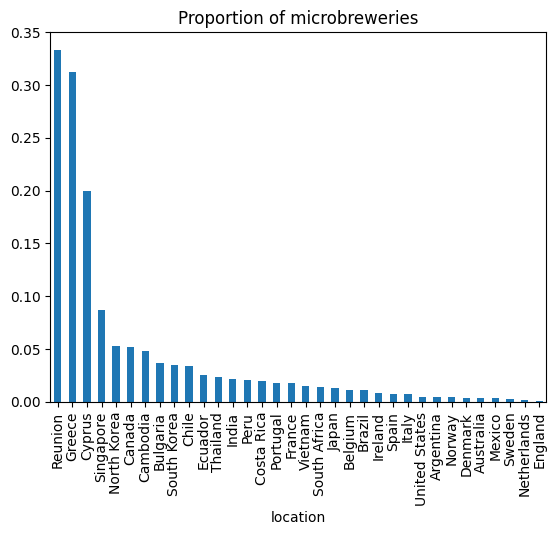

In [169]:
merge['proportion_microbreweries'].plot(kind='bar')
plt.title('Proportion of microbreweries')

## Does microbreweries attract local population?

In [199]:
users=pd.read_csv('users.csv')

wanted_users=users[['user_id','location']]
wanted_micro=microbreweries[['user_id','brewery_id' ]]
microbreweries_users_location = pd.merge(wanted_micro, wanted_users, how='left', left_on='user_id', right_on='user_id')
microbreweries_users_location.rename(columns={'location':'user_location'}, inplace=True)
microbreweries_users_location
    

,user_id,brewery_id,user_location
0,NaN,NaN,NaN
1,111648.0,15008.0,Netherlands
2,111989.0,15008.0,Malaysia
3,308206.0,15008.0,Singapore
4,1786.0,15008.0,Canada
...,...,...,...
32539,21776.0,4253.0,Thailand
32540,4953.0,4253.0,Japan
32541,2778.0,2865.0,Sweden
32542,3847.0,2865.0,"United States, California"


In [200]:
wanted_breweries=breweries[['id','location']]

microbreweries_brewery_location=pd.merge(wanted_micro, wanted_breweries, how='left', left_on='brewery_id', right_on='id')
microbreweries_brewery_location.drop('id',axis=1, inplace=True)
microbreweries_brewery_location.rename(columns={'location':'location_brewery'},inplace=True)
microbreweries_brewery_location

,user_id,brewery_id,location_brewery
0,NaN,NaN,NaN
1,111648.0,15008.0,Singapore
2,111989.0,15008.0,Singapore
3,308206.0,15008.0,Singapore
4,1786.0,15008.0,Singapore
...,...,...,...
32539,21776.0,4253.0,Thailand
32540,4953.0,4253.0,Thailand
32541,2778.0,2865.0,Thailand
32542,3847.0,2865.0,Thailand


In [217]:
import numpy as np
user_loc=microbreweries_users_location['user_location'].astype(str).values
brewery_loc=microbreweries_brewery_location['location_brewery'].astype(str).values
len(np.intersect1d(user_loc,brewery_loc))/len(user_loc)*100


0.15363815142576204

Less than 1% of match! not local population!